In [1]:
import numpy as np #for linear algebra and scientific computing
import pandas as pd #data analysis and manipulation

In [2]:
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split #split into training and testing data
from sklearn.metrics import mean_squared_error #RMSE for evaluation
from sklearn.model_selection import GridSearchCV #for exhaustive grid search(hyperparameter tuning)

#encoders for categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce

In [4]:
cars_Train = pd.read_excel("Data_Train.xlsx")
cars_Test = pd.read_excel("Data_Test.xlsx")

In [5]:
cars = cars_Train.copy()

### Let's explore the data

In [6]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [8]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


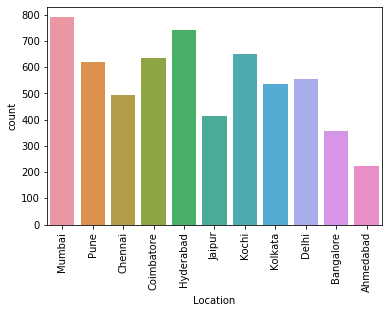

In [9]:
#1   Location
plt.xticks(rotation = 90)
sns.countplot(cars.Location)

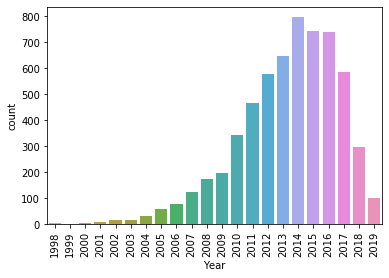

In [10]:
#2   Year
plt.xticks(rotation = 90)
sns.countplot(cars.Year)

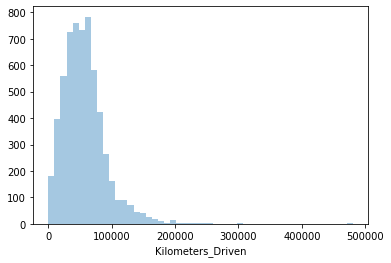

In [11]:
#3   Kilometers_Driven
sns.distplot(cars[cars.Kilometers_Driven<500000].Kilometers_Driven, kde=False)

*We can observe outliers in the data as kilometers driven cannot be so large*

In [12]:
#setting the outliers as nan
cars.loc[cars.Kilometers_Driven > 400000, "Kilometers_Driven"] = np.nan

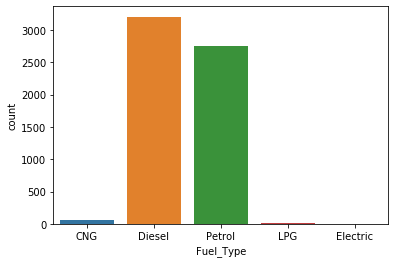

In [13]:
#4   Fuel_Type
sns.countplot(cars.Fuel_Type)

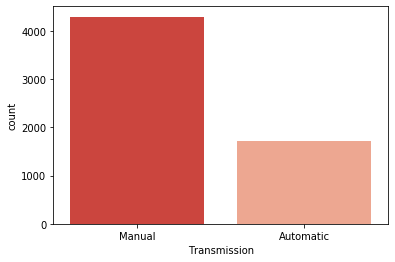

In [14]:
#5   Transmission
sns.countplot(cars.Transmission, palette="Reds_r")

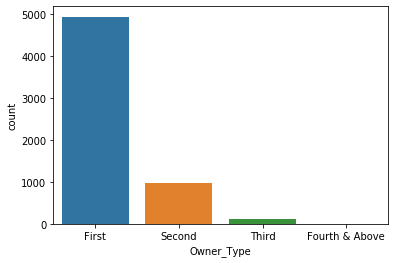

In [15]:
#6   Owner_Type
sns.countplot(cars.Owner_Type, order=['First','Second','Third','Fourth & Above'])

In [16]:
#7   Mileage
print("Null values:", cars.Mileage.isnull().sum())
print("Outliers:",(cars.Mileage==0).sum())

Null values: 2
Outliers: 0


*The null values in `Mileage` is because `Fuel_Type` is `Electric`.*

In [17]:
#Removing units and extracting numerical data from mileage
cars.Mileage = cars.Mileage.str.split(expand=True)[0].astype("float64")

In [18]:
#set the outliers as null
cars[cars.Mileage==0].Mileage = np.nan

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


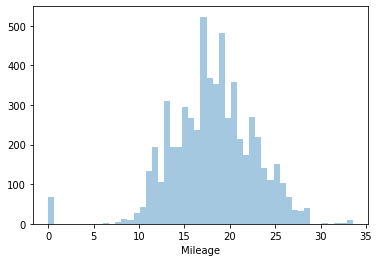

In [19]:
sns.distplot(cars.Mileage, kde=False)

In [20]:
#7   Engine
print("Total null values:",cars.Engine.isnull().sum())
cars[cars.Engine.isnull()].head()

Total null values: 36


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006.0,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001.0,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800.0,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001.0,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005.0,Petrol,Manual,First,12.8,NaN,NaN,NaN,3.20


In [21]:
#Removing units and extracting numerical data from Engine
cars.Engine = cars.Engine.str.split(expand=True)[0].astype("float64")

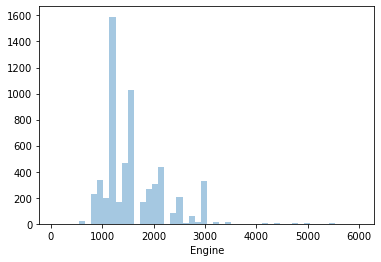

In [22]:
sns.distplot(cars.Engine, kde=False)

In [23]:
#8 Power
print("Total null values:",cars.Power.isnull().sum())
cars[cars.Power.isnull()].head()

Total null values: 36


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006.0,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001.0,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800.0,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001.0,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005.0,Petrol,Manual,First,12.8,NaN,NaN,NaN,3.20


In [24]:
#Removing units and extracting numerical data from Power
cars.Power = cars.Power.apply(lambda s: np.nan if "null" in str(s) else s).str.split(expand=True)[0].astype("float64")

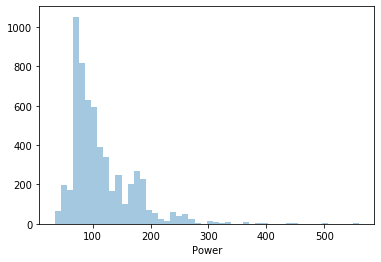

In [25]:
sns.distplot(cars.Power, kde=False)

In [26]:
#9 Seats
print("Total null values:",cars.Seats.isnull().sum())
cars[cars.Seats.isnull()].head()

Total null values: 42


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006.0,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001.0,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436.0,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800.0,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001.0,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,26.50


*Note: Impute Engine, Power and seats based on Brand(extract brand during feature engineering).*

In [27]:
cars.loc[cars.Seats<1,"Seats"] = np.nan

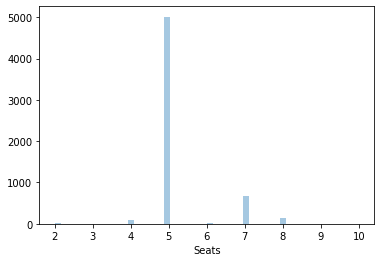

In [28]:
sns.distplot(cars.Seats, kde=False)

In [29]:
#sns.pairplot(cars)

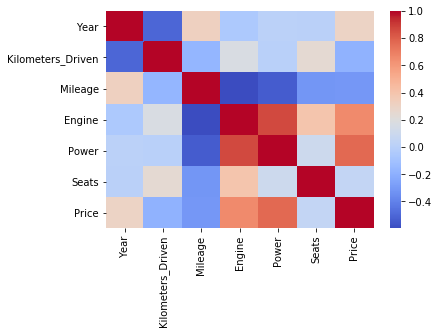

In [30]:
sns.heatmap(cars.corr(), cmap="coolwarm")

***Some Feature Engineering and Preprocessing***

***Extracting brand and model names from name***

In [31]:
carnames = cars.Name.str.split(expand=True)[[0,1,2]]

In [32]:
carnames.rename(columns={0:'Brand',1:'Model',2:'Type'}, inplace=True)

In [33]:
cars = cars.join(carnames)
cars = cars.drop("Name", axis=1)

***Creating new features using combinations of categorical columns***

In [34]:
from itertools import combinations

object_cols = cars.select_dtypes("object").columns
low_cardinality_cols = [col for col in object_cols if cars[col].nunique() < 15]
low_cardinality_cols.append("Brand")
interactions = pd.DataFrame(index=cars.index)

# Iterate through each pair of features, combine them into interaction features
for features in combinations(low_cardinality_cols,2):
    
    new_interaction = cars[features[0]].map(str)+"_"+cars[features[1]].map(str)
    
    encoder = LabelEncoder()
    interactions["_".join(features)] = encoder.fit_transform(new_interaction)

In [35]:
cars = cars.join(interactions) #append to the dataset

In [36]:
cars.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Fuel_Type_Transmission,Fuel_Type_Owner_Type,Fuel_Type_Brand,Transmission_Owner_Type,Transmission_Brand,Owner_Type_Brand
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,...,26,19,28,217,0,0,1,4,38,16
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,...,32,21,32,236,2,3,12,4,33,9
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,...,8,5,6,48,6,10,43,4,32,8
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,...,6,5,6,53,2,3,19,4,38,16
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,...,9,6,12,64,1,5,5,2,0,32


In [37]:
# cars.info()

*Now, we need to impute the missing values*

*And before that we need to do train test split to prevent data leakage*

In [38]:
features = cars.drop(["Price"], axis=1)
target = cars["Price"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

*Now, let's see those missing values*

In [39]:
X_train.isnull().sum()

Location                     0
Year                         0
Kilometers_Driven            6
Fuel_Type                    0
Transmission                 0
Owner_Type                   0
Mileage                      1
Engine                      25
Power                      107
Seats                       31
Brand                        0
Model                        0
Type                         0
Location_Fuel_Type           0
Location_Transmission        0
Location_Owner_Type          0
Location_Brand               0
Fuel_Type_Transmission       0
Fuel_Type_Owner_Type         0
Fuel_Type_Brand              0
Transmission_Owner_Type      0
Transmission_Brand           0
Owner_Type_Brand             0
dtype: int64

*We need to fill missing values in Engine, Power and Seats only. Missing values in Subtype and Subtype_2 would provide a feature.*

*Note: XGBoost and Light GBM have an inbuilt feature to handle missing values. So, we can also leave missing values as it is.*

*Let's fill missing values based on brand column.*


In [40]:
num_cols = X_train.select_dtypes("number")
null_num_cols = num_cols.columns[num_cols.isnull().any()]

for cols in null_num_cols:
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train.groupby('Brand')[cols].transform('mean'))
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train[cols].mean())

    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test.groupby('Brand')[cols].transform('mean'))
    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test[cols].mean())

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
#Binning #didn't provide improvement to results
#Year
# X_train=X_train.drop('Year',1).join(pd.cut(X_train.Year, range(1996,2021,4), False, range(6)).astype('int64'))
# X_test=X_test.drop('Year',1).join(pd.cut(X_test.Year, range(1996,2021,4), False, range(6)).astype('int64'))

#Kilometers_Driven
# X_train=X_train.drop('Kilometers_Driven',1).join(pd.cut(X_train.Kilometers_Driven, range(0,300001,10000), labels= range(30)).astype('int64'))
# X_test=X_test.drop('Kilometers_Driven',1).join(pd.cut(X_test.Kilometers_Driven, range(0,300001,10000), labels= range(30)).astype('int64'))

In [42]:
cars.select_dtypes("object").nunique()

Location         11
Fuel_Type         5
Transmission      2
Owner_Type        4
Brand            31
Model           212
Type            339
dtype: int64

### Encoding the categorical columns

*One-hot encoding*

In [43]:
OHE_cat_features = ["Fuel_Type","Transmission", "Location", "Owner_Type", "Brand"]
OH_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OHE_cat_features]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[OHE_cat_features]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

OH_cols_train.columns = OH_encoder.get_feature_names(OHE_cat_features)
OH_cols_test.columns = OH_encoder.get_feature_names(OHE_cat_features)

X_train_enc = X_train.join(OH_cols_train)
X_test_enc = X_test.join(OH_cols_test)

*Drop OHE encoded columns*

In [44]:
X_train_enc.drop(OHE_cat_features, axis=1, inplace = True)
X_test_enc.drop(OHE_cat_features, axis=1, inplace = True)

*Target encoding*

In [45]:
target_cat_features = X_train_enc.select_dtypes('object').columns
target_enc = ce.TargetEncoder(cols=target_cat_features)
target_enc.fit(X_train[target_cat_features], y_train)
X_train_enc = X_train_enc.join(target_enc.transform(X_train[target_cat_features]).add_suffix('_enc'))
X_test_enc = X_test_enc.join(target_enc.transform(X_test[target_cat_features]).add_suffix('_enc'))

*Drop categorical columns(dtype: object)*

In [46]:
object_cols = X_train_enc.select_dtypes('object')
X_train_enc.drop(object_cols, axis=1, inplace = True)
X_test_enc.drop(object_cols, axis=1, inplace = True)

*Conversion of all columns into int64*

In [47]:
X_train_enc=X_train_enc.astype('int64')
X_test_enc=X_test_enc.astype('int64')

In [48]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 1329 to 2732
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       4514 non-null   int64
 1   Kilometers_Driven          4514 non-null   int64
 2   Mileage                    4514 non-null   int64
 3   Engine                     4514 non-null   int64
 4   Power                      4514 non-null   int64
 5   Seats                      4514 non-null   int64
 6   Location_Fuel_Type         4514 non-null   int64
 7   Location_Transmission      4514 non-null   int64
 8   Location_Owner_Type        4514 non-null   int64
 9   Location_Brand             4514 non-null   int64
 10  Fuel_Type_Transmission     4514 non-null   int64
 11  Fuel_Type_Owner_Type       4514 non-null   int64
 12  Fuel_Type_Brand            4514 non-null   int64
 13  Transmission_Owner_Type    4514 non-null   int64
 14  Transmission_Brand   

***Feature selection based on pearson correlation***

In [49]:
pcorr = X_train_enc.join(y_train).corr()
imp_corr_cols = pcorr[['Price']][pcorr['Price']>-0.2].iloc[:-1].index

X_train_enc = X_train_enc[imp_corr_cols]
X_test_enc = X_test_enc[imp_corr_cols]

In [50]:
from xgboost import XGBRegressor

***XGB model***

In [51]:
base_xgbr = XGBRegressor(objective='reg:squarederror')
base_xgbr.fit(X_train_enc,y_train)

base_xgbr.score(X_test_enc,y_test) #r2 score

0.9105646310655051

*Visualizing the test results*

3.343367193684315


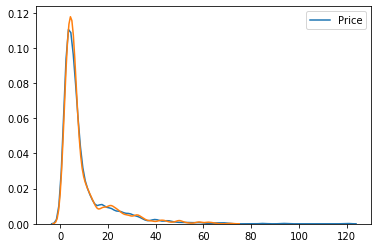

In [52]:
yhat_xgbr = base_xgbr.predict(X_test_enc)
print(mean_squared_error(y_test, yhat_xgbr, squared=False))
sns.kdeplot(y_test)
sns.kdeplot(yhat_xgbr)

*Feature importance based on the XGBoost model*

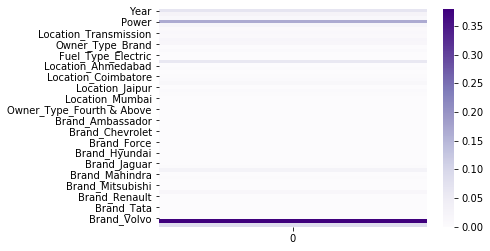

In [53]:
feat_imp = pd.DataFrame(base_xgbr.feature_importances_, index=X_train_enc.columns)
sns.heatmap(feat_imp, cmap='Purples')

***Feature selection based on XGBoost model***

In [54]:
impfeat = pd.Series(base_xgbr.feature_importances_, index=X_train_enc.columns)
impcols = impfeat[impfeat>0.01].index
X_train_enc = X_train_enc[impcols]
X_test_enc = X_test_enc[impcols]

*Visualizing pearson correlation of finally selected columns*

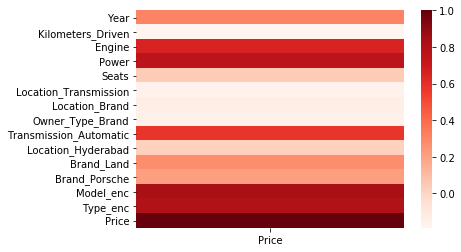

In [55]:
sns.heatmap(X_train_enc.join(y_train).corr()[['Price']], cmap='Reds')

In [56]:
#testing xgbr model
# param_grid = {
#     "learning_rate": [0.05],
#     "max_depth": [6,8,10,12],
#     "min_child_weight": [5],
#     "n_estimators": [350,400,450,500],
#     "subsample": [0.55]
# }
# gscv = GridSearchCV(estimator=base_xgbr, param_grid=param_grid, n_jobs=-1, verbose=5, cv=4)

In [57]:
# gscv.fit(X_train_enc, y_train)

In [58]:
#the best params from the given parameter grid
# gscv.best_params_
# gscv.score(X_test_enc,y_test) #r2 score

In [59]:
# tuned_xgbr = XGBRegressor(objective = 'reg:squarederror',
#                     learning_rate = 0.05, max_depth = 12, min_child_weight = 5,
#                     n_estimators = 500, subsample = 0.55)
# tuned_xgbr.fit(X_train_enc,y_train)

# tuned_xgbr.score(X_test_enc,y_test) #r2 score

In [60]:
# yhat_xgbr = tuned_xgbr.predict(X_test_enc)
# print(mean_squared_error(y_test, yhat_xgbr, squared=False))
# sns.kdeplot(y_test)
# sns.kdeplot(yhat_xgbr)

### Base LGBM model

In [61]:
from lightgbm import LGBMRegressor

In [62]:
base_lgbmr = LGBMRegressor()

In [63]:
base_lgbmr.fit(X_train_enc, y_train)
yhat_lgbmr = base_lgbmr.predict(X_test_enc)

3.295220991719196


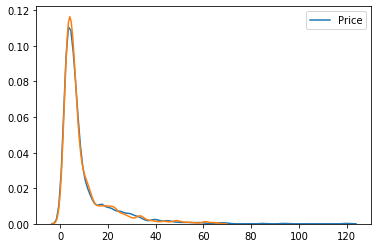

In [64]:
base_lgbmr.score(X_test_enc,y_test)
print(mean_squared_error(y_test, yhat_lgbmr, squared=False))
sns.kdeplot(y_test)
sns.kdeplot(yhat_lgbmr)

In [65]:
#feature importance
#pd.Series(base_lgbmr.feature_importances_, index=X_train_enc.columns)

In [66]:
base_lgbmr.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [67]:
#initial grid search
param_grid = {
    "learning_rate": [0.05,0.1],
    "max_depth": range(6,13,2),
    "min_child_weight": [3,5,6],
    "n_estimators": [300,350,400,450,500],
    "num_leaves": range(20,61,5),
    "subsample": [0.3,0.5,0.6]
}
gscv_lgbm = GridSearchCV(estimator=base_lgbmr, param_grid=param_grid, n_jobs=-1, verbose=5, cv=4)

In [68]:
# gscv_lgbm.fit(X_train_enc, y_train)

In [69]:
# gscv_lgbm.best_params_

In [70]:
# gscv_lgbm.score(X_test_enc,y_test) #r2 score

In [71]:
param_grid2 = {
    "learning_rate": [0.1],
    "max_depth": [9],
    "min_child_weight": range(3,11),
    "n_estimators": [1000],
    "num_leaves": [25],
    "subsample": [0.5]
}
gscv_lgbm2 = GridSearchCV(estimator=base_lgbmr, param_grid=param_grid2, n_jobs=-1, verbose=5, cv=4)

In [72]:
gscv_lgbm2.fit(X_train_enc, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   17.6s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [9],
                         'min_child_weight': range(3, 11),
                         'n_estimators': [1000], 'num_le

In [73]:
print(gscv_lgbm2.best_params_)
print(gscv_lgbm2.score(X_test_enc,y_test)) #r2 score

{'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 1000, 'num_leaves': 25, 'subsample': 0.5}
0.9305241728587728


### Tuned LGBM model

In [74]:
tuned_lgbmr = LGBMRegressor(
    learning_rate= 0.1,
    max_depth= 9,
    min_child_weight= 3,
    n_estimators= 1000,
    num_leaves= 25,
    subsample= 0.5)
tuned_lgbmr.fit(X_train_enc, y_train)
tuned_lgbmr.score(X_test_enc,y_test)

0.9305241728587728

2.9467703285951337


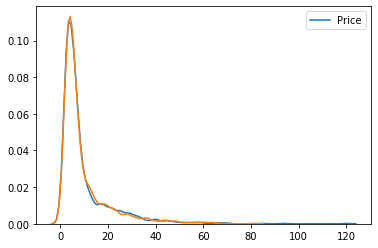

In [75]:
yhat_lgbmr = tuned_lgbmr.predict(X_test_enc)
print(mean_squared_error(y_test, yhat_lgbmr, squared=False))
sns.kdeplot(y_test)
sns.kdeplot(yhat_lgbmr)

*The Tuned LGBM Regressor model will be used as the final model for our predictions*

In [76]:
# Custom Label Encoder for handling unknown values
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


***Let's preprocess our original training data.***

In [77]:
X_train = cars_Train.drop('Price',1)
y_train = cars.Price
X_test = cars_Test

*Let's apply the feature engineering and preprocessing to the training and testing data*

In [78]:
carnames = X_train.Name.str.split(expand=True)[[0,1,2]]
carnames_test = X_test.Name.str.split(expand=True)[[0,1,2]]

carnames.rename(columns={0:'Brand',1:'Model',2:'type'}, inplace=True)
carnames_test.rename(columns={0:'Brand',1:'Model',2:'type'}, inplace=True)

X_train = X_train.join(carnames)
X_train = X_train.drop("Name", axis=1)
X_test = X_test.join(carnames_test)
X_test = X_test.drop("Name", axis=1)

In [79]:
object_cols = X_train.select_dtypes("object").columns
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 15]
low_cardinality_cols.append("Brand")
interactions = pd.DataFrame(index=X_train.index)
interactions_test = pd.DataFrame(index=X_test.index)

for features in combinations(low_cardinality_cols,2):
    
    new_interaction = X_train[features[0]].map(str)+"_"+X_train[features[1]].map(str)
    new_interaction_test = X_test[features[0]].map(str)+"_"+X_test[features[1]].map(str)
    
    encoder = LabelEncoderExt()
    encoder.fit(new_interaction)
    interactions["_".join(features)] = encoder.transform(new_interaction)
    interactions_test["_".join(features)] = encoder.transform(new_interaction_test)

In [80]:
X_train = X_train.join(interactions)
X_test = X_test.join(interactions_test)

In [81]:
num_cols = X_train.select_dtypes("number")
null_num_cols = num_cols.columns[num_cols.isnull().any()]

for cols in null_num_cols:
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train.groupby('Brand')[cols].transform('mean'))
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train[cols].mean())

    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test.groupby('Brand')[cols].transform('mean'))
    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test[cols].mean())

In [82]:
OHE_cat_features = ["Fuel_Type","Transmission", "Location", "Owner_Type", "Brand"]
OH_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OHE_cat_features]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[OHE_cat_features]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

OH_cols_train.columns = OH_encoder.get_feature_names(OHE_cat_features)
OH_cols_test.columns = OH_encoder.get_feature_names(OHE_cat_features)

X_train_enc = X_train.join(OH_cols_train)
X_test_enc = X_test.join(OH_cols_test)

In [83]:
X_train_enc.drop(OHE_cat_features, axis=1, inplace = True)
X_test_enc.drop(OHE_cat_features, axis=1, inplace = True)

In [84]:
target_cat_features = X_train_enc.select_dtypes('object').columns
target_enc = ce.TargetEncoder(cols=target_cat_features)
target_enc.fit(X_train[target_cat_features], y_train)
X_train_enc = X_train_enc.join(target_enc.transform(X_train[target_cat_features]).add_suffix('_enc'))
X_test_enc = X_test_enc.join(target_enc.transform(X_test[target_cat_features]).add_suffix('_enc'))

In [85]:
object_cols = X_train_enc.select_dtypes('object')
X_train_enc.drop(object_cols, axis=1, inplace = True)
X_test_enc.drop(object_cols, axis=1, inplace = True)

In [86]:
X_train_enc=X_train_enc.astype('int64')
X_test_enc=X_test_enc.astype('int64')

In [87]:
pcorr = X_train_enc.join(y_train).corr()
imp_corr_cols = pcorr[['Price']][pcorr['Price']>-0.2].iloc[:-1].index

X_train_enc = X_train_enc[imp_corr_cols]
X_test_enc = X_test_enc[imp_corr_cols]

In [88]:
xgbr = XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train_enc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [89]:
impfeat = pd.Series(xgbr.feature_importances_, index=X_train_enc.columns)
impcols = impfeat[impfeat>0.01].index
X_train_enc = X_train_enc[impcols]
X_test_enc = X_test_enc[impcols]

*Model Training*

In [90]:
lgbmr = LGBMRegressor(
    learning_rate= 0.1,
    max_depth= 9,
    min_child_weight= 3,
    n_estimators= 1000,
    num_leaves= 25,
    subsample= 0.5)

lgbmr.fit(X_train_enc, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=9,
              min_child_samples=20, min_child_weight=3, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=25, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

***Let's predict***

In [91]:
preds_test = lgbmr.predict(X_test_enc)

In [92]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)